In [2]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# The Winchmore Met Data

The Winchmore Met site is a high standard meteorological site approximately 30 km from the trial site at Wakanui.  This data is used as a reference to check the met data recorded locally at the trial in Wakanui

## Bring in the Lincoln met data

In [14]:
WinchmoreRawData = pd.read_csv('Winchmore.met',skiprows=11,usecols=[1,4,5,7,8,10,19],
                      names=['DATE','WIND','RAIN','TMAX','TMIN','VPRS','SRAD'],
                     na_values = ['-'])
WinchmoreRawData.ix[:,'DATE'] =  pd.to_datetime(WinchmoreRawData.ix[:,'DATE'])
WinchmoreRawData.ix[:,'WIND'] = WinchmoreRawData.ix[:,'WIND'] * 1000 / (24 * 60 * 60)
idxSer = range(WinchmoreRawData.index.size)
WinchmoreRawData.ix[:,'Year'] = [WinchmoreRawData.ix[x,'DATE'].year for x in idxSer]
WinchmoreRawData.ix[:,'Day'] = [WinchmoreRawData.ix[x,'DATE'].dayofyear for x in idxSer]
WinchmoreRawData.set_index(['Year','Day'],inplace=True,drop=False)
WinchmoreRawData.where(WinchmoreRawData>-90,np.nan,inplace=True)

## Make graphs of long term means

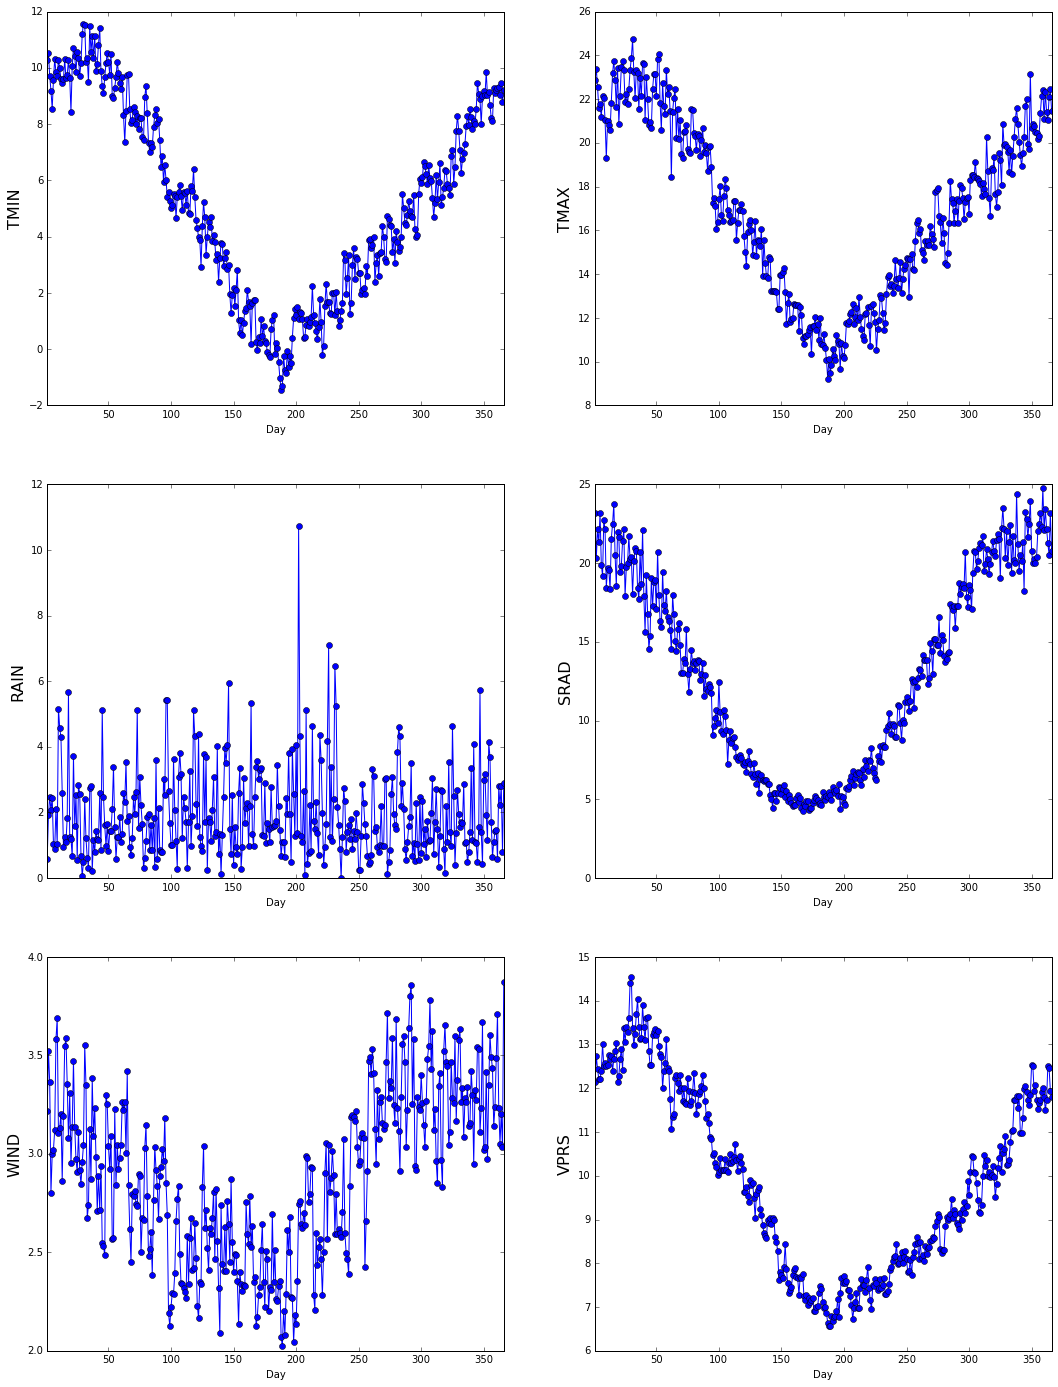

In [16]:
Fig = plt.figure(figsize = (18,24))
Position = 1
for x in [u'TMIN', u'TMAX', u'RAIN', u'SRAD', u'WIND', u'VPRS']:
    Fig.add_subplot(3,2,Position)
    Means = WinchmoreRawData.groupby(level='Day').mean()
    Means.ix[:,x].plot(marker='o')
    plt.ylabel(x,fontsize = 16)
    Position +=1

## Some pretty summary graphs

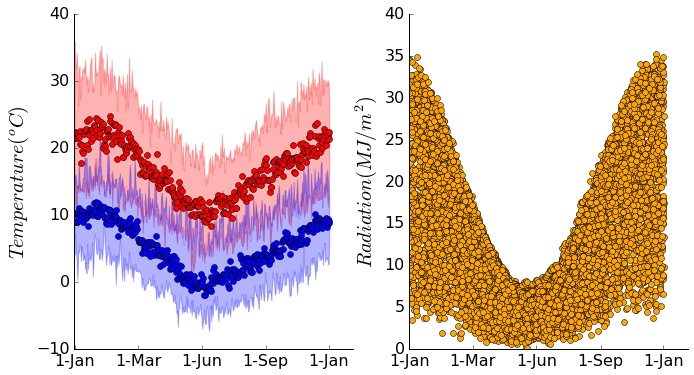

In [19]:
Fig = plt.figure(figsize = (11,6))
#for x in [u'TMIN', u'TMAX', u'RAIN', u'SRAD', u'WIND', u'VPRS']:
Ax = Fig.add_subplot(1,2,1)
plt.tick_params(labelsize=16)
Ax.spines['right'].set_visible(False)
Ax.spines['top'].set_visible(False)
plt.tick_params(axis='x', which='both', bottom='on',top='off', labelbottom='on')
plt.tick_params(axis='y', which='both', left='on',right='off', labelbottom='on')
Medians = WinchmoreRawData.ix[:,'TMAX'].groupby(level='Day').median()
#SEs = LincolnRawData.groupby(level='Day').std()
Upper = WinchmoreRawData.ix[:,'TMAX'].groupby(level='Day').max()
Lower = WinchmoreRawData.ix[:,'TMAX'].groupby(level='Day').min()
plt.fill_between(Medians.index,
                     Upper,
                     Lower,
                alpha = 0.3,color='r')
plt.plot(Medians,'o',color='r')
Medians = WinchmoreRawData.ix[:,'TMIN'].groupby(level='Day').median()
#SEs = LincolnRawData.groupby(level='Day').std()
Upper = WinchmoreRawData.ix[:,'TMIN'].groupby(level='Day').max()
Lower = WinchmoreRawData.ix[:,'TMIN'].groupby(level='Day').min()
plt.fill_between(Medians.index,
                     Upper,
                     Lower,
                alpha = 0.3,color='b')
plt.plot(Medians,'o',color='b')
plt.ylabel(r'$Temperature (^oC)$',fontsize=20)
Ax.set_xticks([1,92,183,275,365])
Ax.set_xticklabels(['1-Jan','1-Mar','1-Jun','1-Sep','1-Jan'])
Ax = Fig.add_subplot(1,2,2)
plt.tick_params(labelsize=16)
Ax.spines['right'].set_visible(False)
Ax.spines['top'].set_visible(False)
plt.tick_params(axis='x', which='both', bottom='on',top='off', labelbottom='on')
plt.tick_params(axis='y', which='both', left='on',right='off', labelbottom='on')
DayIndexed = WinchmoreRawData.copy()
DayIndexed.index = DayIndexed.index.droplevel('Year')
plt.plot(DayIndexed.index,DayIndexed.ix[:,'SRAD'],'o',color='orange')
plt.ylabel(r'$Radiation (MJ/m^2)$',fontsize=20)
Ax.set_xticks([1,92,183,275,365])
Ax.set_xticklabels(['1-Jan','1-Mar','1-Jun','1-Sep','1-Jan'])

# Clean up the Winchmore data where necessary

## Replace suspect data with nan

In [20]:
Winchmore = WinchmoreRawData.copy()
Winchmore.ix[:,'TMIN'].where(Winchmore.ix[:,'TMIN']>-10,np.nan,inplace=True)
Winchmore.ix[:,'TMAX'].where(Winchmore.ix[:,'TMAX']<35,np.nan,inplace=True)
Winchmore.ix[:,'RAIN'].where(Winchmore.ix[:,'RAIN']<200,np.nan,inplace=True)
Winchmore.ix[:,'SRAD'].where(Winchmore.ix[:,'SRAD']<35,np.nan,inplace=True)
Winchmore.ix[:,'WIND'].where(Winchmore.ix[:,'WIND']<2000,np.nan,inplace=True)
Winchmore.ix[:,'VPRS'].where(Winchmore.ix[:,'VPRS']<30,np.nan,inplace=True)

## The replace the nan's with long term mean

In [22]:
Winchmore

DATE      WIND  RAIN  TMAX  TMIN  VPRS   SRAD  Year  Day
Year Day                                                               
1996 73  1996-03-13       NaN   0.0   NaN   NaN   NaN   1.80  1996   73
     74  1996-03-14  3.391204   0.0  23.2   8.2   NaN  19.43  1996   74
     75  1996-03-15  3.541667   6.0  16.7   6.5   NaN   7.04  1996   75
     76  1996-03-16  1.817130   4.0  15.8   3.7   NaN  20.21  1996   76
     77  1996-03-17  2.511574   0.2  21.0   4.0   NaN  13.09  1996   77
     78  1996-03-18  2.557870   0.2  23.2   7.1   NaN  17.77  1996   78
     79  1996-03-19  3.344907   0.2  19.0   8.3   NaN  13.40  1996   79
     80  1996-03-20  2.986111   0.2  18.2   5.9   NaN  19.46  1996   80
     81  1996-03-21  2.662037   0.0  19.7   8.3   NaN  14.28  1996   81
     82  1996-03-22  1.701389   1.9  20.4   8.2   NaN  12.23  1996   82
     83  1996-03-23  2.222222   2.0  11.8   4.8   NaN   7.67  1996   83
     84  1996-03-24  2.233796   0.5  16.4   2.5   NaN  18.98  1996   84
     85  1996-03-25  1.967593   0.0  18.0   3.5   NaN  17.86  1996   85
     86  1996-03-26  1.712963   0.0  15.2   7.7   NaN  12.53  1996   86
     87  1996-03-27  2.037037   0.0  16.4   8.4   NaN  13.89  1996   87
     88  1996-03-28  2.222222   0.7  18.9   5.0   NaN  16.54  1996   88
     89  1996-03-29  2.800926   0.5  16.8   8.4   NaN  12.53  1996   89
     90  1996-03-30  3.182870   0.0  19.8   8.2   NaN  18.30  1996   90
     91  1996-03-31  2.777778   0.0  17.0  10.4   NaN  10.17  1996   91
     92  1996-04-01  1.956019   0.0  15.5   6.1   NaN   7.14  1996   92
     93  1996-04-02  3.692130   0.0  20.7   5.7   NaN   8.57  1996   93
     94  1996-04-03  7.534722   0.2  17.7   8.5   NaN  16.88  1996   94
     95  1996-04-04  7.002315   2.2  15.2   8.4   NaN  10.51  1996   95
     96  1996-04-05  3.611111   0.0  18.9   5.6   NaN  14.22  1996   96
     97  1996-04-06  3.101852  13.8  16.9   3.4   NaN  13.69  1996   97
     98  1996-04-07  1.770833   5.8  11.4   7.3   NaN   7.68  1996   98
     99  1996-04-08  3.182870   0.0  13.0   3.6   NaN  10.75  1996   99
     100 1996-04-09  1.840278   0.6  18.4   8.2   NaN  12.65  1996  100
     101 1996-04-10  1.990741   0.0  20.6   4.1   NaN  15.06  1996  101
     102 1996-04-11  1.446759   7.0  13.0   6.9   NaN   3.73  1996  102
...             ...       ...   ...   ...   ...   ...    ...   ...  ...
2018 3   2018-01-03  3.136574   0.1  25.4  13.5  17.6  18.25  2018    3
     4   2018-01-04  2.905093   0.0  22.1  13.4  17.7  11.55  2018    4
     5   2018-01-05  6.643519  34.3  15.8  11.0  15.1   3.42  2018    5
     6   2018-01-06  7.361111   0.7  15.9   9.3  10.7  14.27  2018    6
     7   2018-01-07  2.789352   0.3  21.3   4.4  11.4  18.62  2018    7
     8   2018-01-08  5.127315   0.0  22.4  10.2  14.2  23.62  2018    8
     9   2018-01-09  2.928241   0.3  21.8  12.8  16.9  12.02  2018    9
     10  2018-01-10  3.298611  13.0  15.4  11.2  14.7   5.01  2018   10
     11  2018-01-11  2.673611  44.0  13.6   8.5  13.0   4.50  2018   11
     12  2018-01-12  3.923611   4.9  14.7   9.9  13.3   6.53  2018   12
     13  2018-01-13  4.351852   0.8  23.3  10.6  16.2  15.32  2018   13
     14  2018-01-14  3.587963   0.1  28.8  10.3  16.4  24.04  2018   14
     15  2018-01-15  5.856481   0.0  28.8  12.5  16.9  23.44  2018   15
     16  2018-01-16  7.245370   0.0  28.6  18.6  16.1  23.84  2018   16
     17  2018-01-17  5.937500   0.2  25.0  17.6  16.2  10.33  2018   17
     18  2018-01-18  3.796296   0.7  25.2  14.6  17.6  19.95  2018   18
     19  2018-01-19  3.946759   0.1  24.2  14.4  17.6  15.89  2018   19
     20  2018-01-20  3.287037   0.0  27.8  12.5  16.4  22.94  2018   20
     21  2018-01-21  2.604167   0.1  21.1  14.3  17.8   8.04  2018   21
     22  2018-01-22  2.071759   0.1  23.6  14.6  18.6  13.10  2018   22
     23  2018-01-23  4.351852   0.0  29.8  15.6  19.5  22.69  2018   23
     24  2018-01-24  3.171296   0.0  32.9  13.6  18.0  20.77  2018   24
     25  2018-01-25  3.229167   0.5  31.4  14.5  19.4  

In [24]:
x

(1996L, 73L)

In [25]:
var

u'TMIN'

In [27]:
Winchmore.ix[x,var]== np.nan

Year  Day
1996  73     False
Name: TMIN, dtype: bool

In [23]:
for var in [u'TMIN', u'TMAX', u'RAIN', u'SRAD', u'WIND', u'VPRS']:
    for x in Winchmore.index:
        Day = Winchmore.ix[x,'Day']
        if Winchmore.ix[x,var] == np.nan:
            Winchmore.ix[x,var] = Means.ix[Day,var]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## Put in a Date column into lincoln Data

In [160]:
for x in Lincoln.index:
    OneDate = datetime.datetime(Lincoln.ix[x,'Year'],1,1)
    JDayLessOne = int(Lincoln.ix[x,'Day']-1)
    TodayDate = OneDate + datetime.timedelta(JDayLessOne)
    Lincoln.ix[x,'Date'] = TodayDate

## Graph cleaned data to make sure all is OK

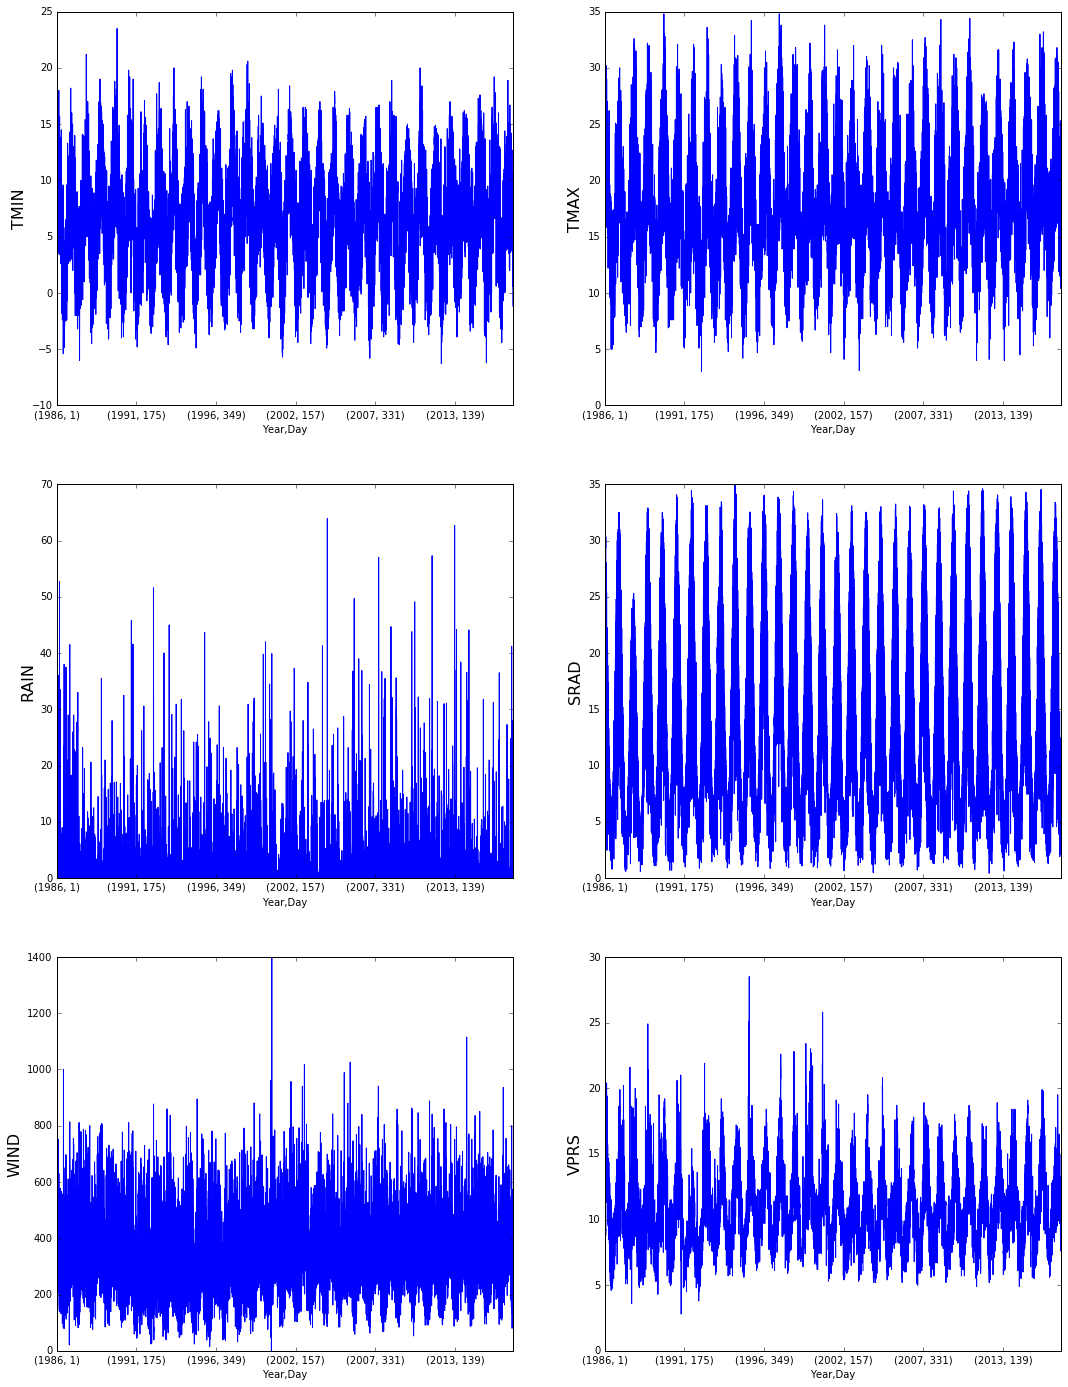

In [161]:
Fig = plt.figure(figsize = (18,24))
Position = 1
for x in [u'TMIN', u'TMAX', u'RAIN', u'SRAD', u'WIND', u'VPRS']:
    Fig.add_subplot(3,2,Position)
    Lincoln.ix[:,x].plot()
    plt.ylabel(x,fontsize = 16)
    Position +=1

## Set the date as index to enable matching with Leeston data

In [162]:
Lincoln.set_index('Date',inplace=True)

# The Leeston data. 
Temperature, solar radiation and rainfall measured at the site for each year of trial

## Bring in the 2013/14 data

In [163]:
Leeston1314 = pd.read_excel('D:\\GitHubRepos\\2020\\Weather\\Leeston1314.xlsx',
              skiprows=4,header = None,na_values='NAN')
Leeston1314.columns =['DATE','Rec','TMIN','TTMINime','TMAX','tTMAXime','RAIN','kw','SRAD']
Leeston1314.set_index('DATE',inplace=True)
Leeston1314.index = Leeston1314.index - datetime.timedelta(days=1)
Leeston1314.drop(['Rec','TTMINime','tTMAXime','kw'],axis=1,inplace=True)

## Regress against Lincoln data to check

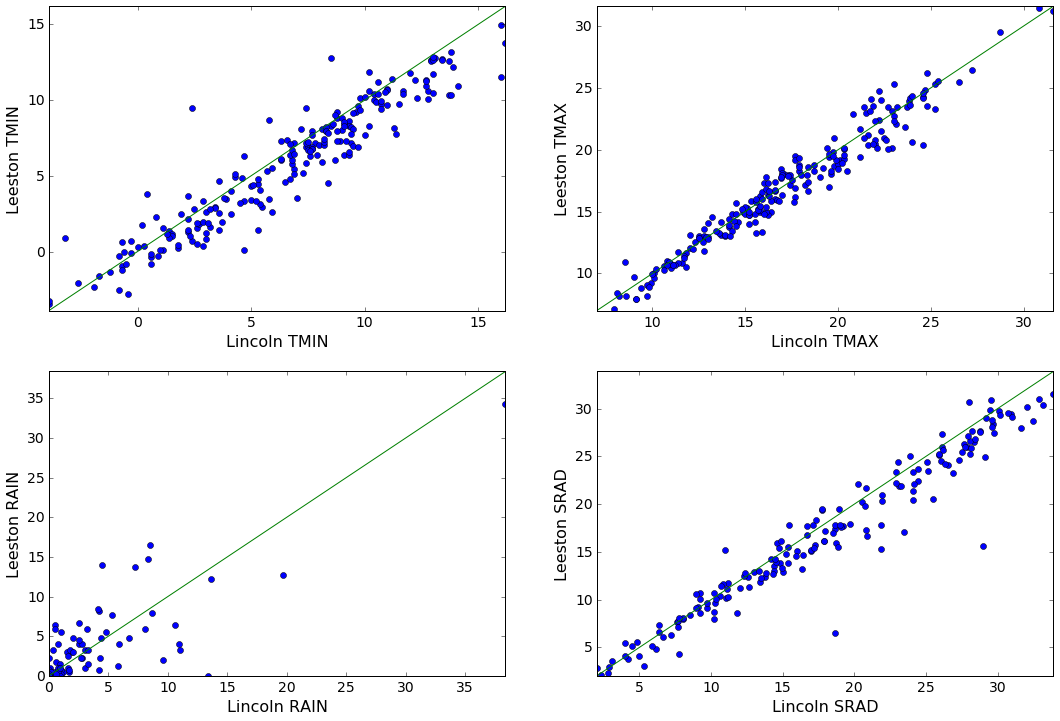

In [164]:
Fig = plt.figure(figsize = (18,12))
Position = 1
for x in [u'TMIN', u'TMAX', u'RAIN', u'SRAD']:
    Fig.add_subplot(2,2,Position)
    #plt.plot(Leeston1314.ix[:,x])
    Ind = Leeston1314.ix[:,x].index
    plt.plot(Lincoln.ix[Ind,x],Leeston1314.ix[:,x],'o')
    maxx = Lincoln.ix[Ind,x].max()
    minx = Lincoln.ix[Ind,x].min()
    plt.ylim(minx,maxx)
    plt.xlim(minx,maxx)
    plt.ylabel('Leeston '+x,fontsize=16)
    plt.xlabel('Lincoln '+x,fontsize=16)
    plt.tick_params(labelsize=14)
    plt.plot([minx,maxx],[minx,maxx],'-')
    Position +=1

### Good agreement between Leeston and Lincoln data suggesting met data recoreded on site is good and that Lincoln data can be used to gap fill Leeston data


## Bring in Leeston data for the next year

In [165]:
Leeston1415hourly = pd.read_excel('D:\\GitHubRepos\\2020\\Weather\\Leeston1415.xlsx',
              skiprows=4,header = None,na_values='NAN')
Leeston1415hourly.columns =['DATETime','Rec','RAIN','TMIN','TTMINime','TMAX','tTMAXime','kw','SRAD']
Leeston1415hourly.set_index('DATETime',inplace=True)
Leeston1415hourly.drop(['Rec','TMIN','TTMINime','tTMAXime','TMAX','kw'],axis=1,inplace=True)
Leeston1415 = Leeston1415hourly.resample('d').sum()
#apply calibratin coefficient to get radiation into correct units
Leeston1415.ix[:,'SRAD'] = Leeston1415.ix[:,'SRAD'].multiply(43)

## Join with other Leeston data and remove any errant values

In [166]:
LeestonLocal = pd.concat([Leeston1314,Leeston1415])
LeestonLocal.ix[:,'TMIN'].where(LeestonLocal.ix[:,'TMIN']>-10,np.nan,inplace=True)
LeestonLocal.ix[:,'TMAX'].where(LeestonLocal.ix[:,'TMAX']<35,np.nan,inplace=True)
LeestonLocal.ix[:,'RAIN'].where(LeestonLocal.ix[:,'RAIN']<200,np.nan,inplace=True)
LeestonLocal.ix[:,'SRAD'].where(LeestonLocal.ix[:,'SRAD']<35,np.nan,inplace=True)

## Make an empty DataFrame with all the met data needed for APMIP over the dates required and include the Leeston weather measured on site

In [167]:
start = datetime.datetime(2013,01,01)
end = datetime.datetime(2015,07,02)
DateIndex = pd.to_datetime([start + datetime.timedelta(days=x) for x in range(0, (end-start).days)])
Leeston = pd.DataFrame(index = DateIndex,
                       columns = [u'TMIN', u'TMAX', u'RAIN', u'SRAD', u'WIND', u'VPRS'],  
                       data = np.nan)
Leeston.index.name = 'Date'
Leeston.update(LeestonLocal)

## This DataFrame contains a number of gaps so plug the gaps with Lincoln met data

In [168]:
for var in [u'TMIN', u'TMAX', u'RAIN', u'SRAD', u'WIND', u'VPRS']:
    for x in Leeston.index:
        if np.isnan(Leeston.ix[x,var]):
            Leeston.ix[x,var] = Lincoln.ix[x,var]

## The figure below displays the met data included in the Leeston met file with the green data being measured on site and the blue data being measured at the nearby Lincoln site

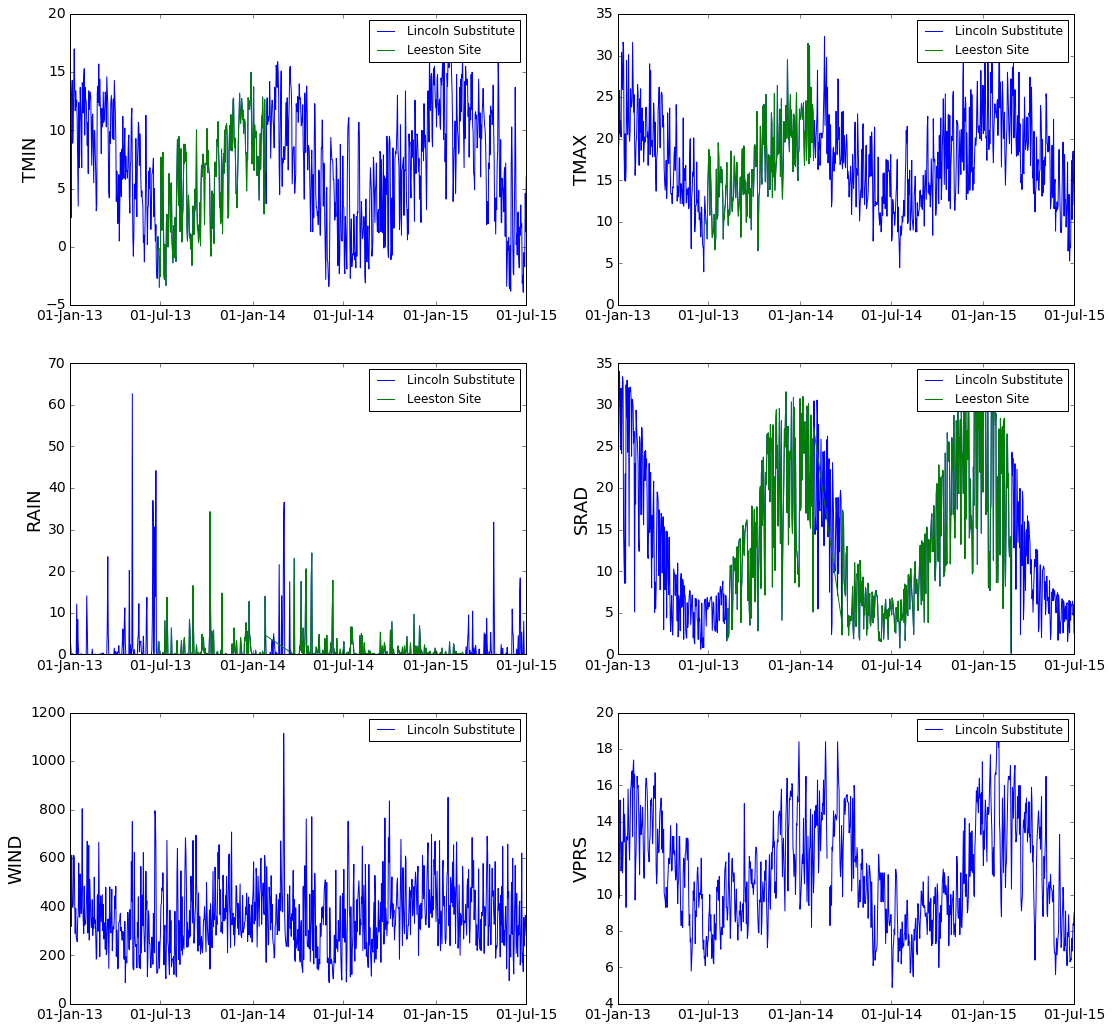

In [169]:
Fig = plt.figure(figsize = (18,24))
Position = 1
for x in [u'TMIN', u'TMAX', u'RAIN', u'SRAD', u'WIND', u'VPRS']:
    axis = Fig.add_subplot(4,2,Position)
    plt.plot(Leeston.ix[:,x],label = 'Lincoln Substitute')
    try:
        plt.plot(LeestonLocal.ix[:,x],label = 'Leeston Site')
    except:
        dummy = 'dumbass'
    plt.legend()
    plt.ylabel(x,fontsize=18)
    plt.tick_params(labelsize=14)
    axis.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
    axis.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
    Position +=1

## Export the Data to a csv file.

In [170]:
Leeston.to_csv('Leeston.met')